# Batch Normalization

### Xavier, He 등을 가중치의 초기값에 적용하여 활성화 값이 계속 적절한 분포를 유지할수 있도록 했다.  Batch Normd은 각 층의 활성화 값(활성화 함수 출력값)을 적절히 퍼뜨리도록 강제하는 역할(함수)을 한다.

<효과>
1. 학습 속도 개선
2. 초기값에 크게 의존하지 않음
3. 오버피팅 억제

<한계>
1. 미니 배치 크기에 의존적이다.
배치 정규화는 너무 작은 배치 크기에서는 잘 동작하지 않을 수 있다. 단적으로 배치 크기를 1로 하게되면 분산은 0이 됩니다. 작은 미니 배치에서는 배치 정규화의 효과가 극단적으로 작용되어 훈련에 악영향을 줄 수 있다. 배치 정규화를 적용할때는 작은 미니 배치보다는 크기가 어느정도 되는 미니 배치에서 하는 것이 좋다. 

2. RNN에 적용하기 어렵다.
RNN은 각 시점(time step)마다 다른 통계치를 갖는다. 이는 RNN에 배치 정규화를 적용하는 것을 어렵게 만듬. 
이를 극복하기 위해 RNN에서 배치 정규화를 적용하기 위한 몇 가지 논문(방안)이 제시되어 있다, 

=> 계층 정규화(layer normalization)는
배치 크기에도 의존적이지 않으며, RNN에도 적용하다 (탄생 배경)

* 배치놈
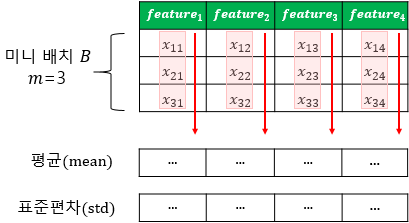

* 레이어놈
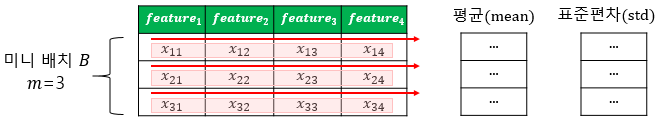

- 배치놈은 Affine과 활성화 함수 사이에 존재하도록함
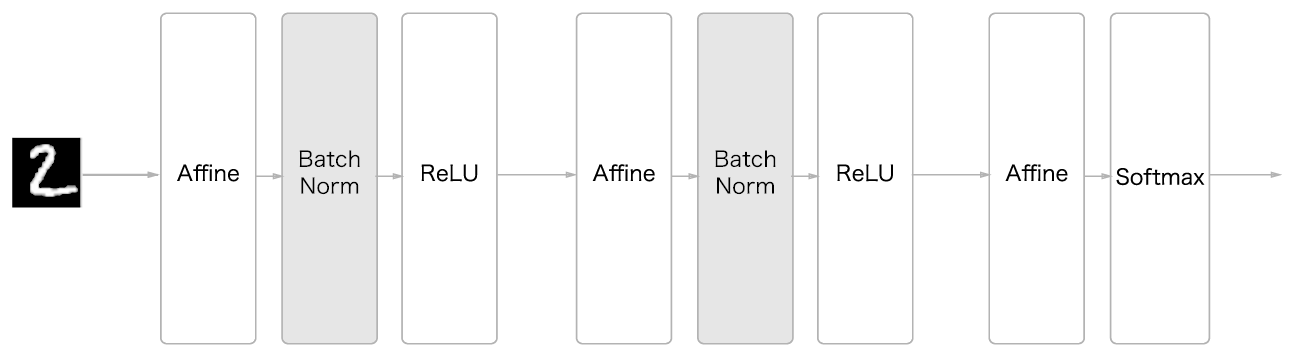


* CNN에서의 배치놈 위치

Batch Norm 연산은 FC(Fully-Connected Layer)나 Conv(Convolution Layer) 직후에 넣어줍니다.
https://deepinsight.tistory.com/116

Batch Normalization을 CNN에 적용시키고 싶을 경우 다소 다른 방법을 이용해야만 한다. 
먼저, convolution layer에서 보통 activation function에 값을 넣기 전 Wx+b 형태로 weight를 적용시키는데, Batch Normalization을 사용하고 싶을 경우 normalize 할 때 beta 값이 b의 역할을 대체할 수 있기 때문에 b를 없애준다. 또한, CNN의 경우 convolution의 성질을 유지시키고 싶기 때문에, 각 channel을 기준으로  각각의 Batch Normalization 변수들을 만든다. 
https://shuuki4.wordpress.com/2016/01/13/batch-normalization-%EC%84%A4%EB%AA%85-%EB%B0%8F-%EA%B5%AC%ED%98%84/

특징 맵의 크기가 𝑝 ∗ 𝑞 라면 미니배치에 있는 샘플마다 𝑝q 개의 값이 발생하므로, 코드 1은 총 pqm 개
의 값을 가지고 평균 𝜇𝐵와 표준편차 𝜎𝐵를 계산한다. 𝛾와 𝛽는 특징 맵마다 하나씩 있다. 


- 배치 정규화를 썼을때의 성능
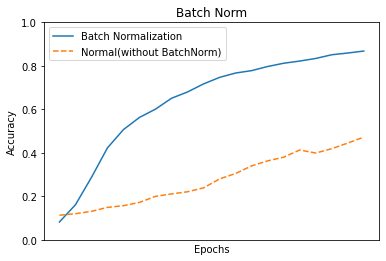

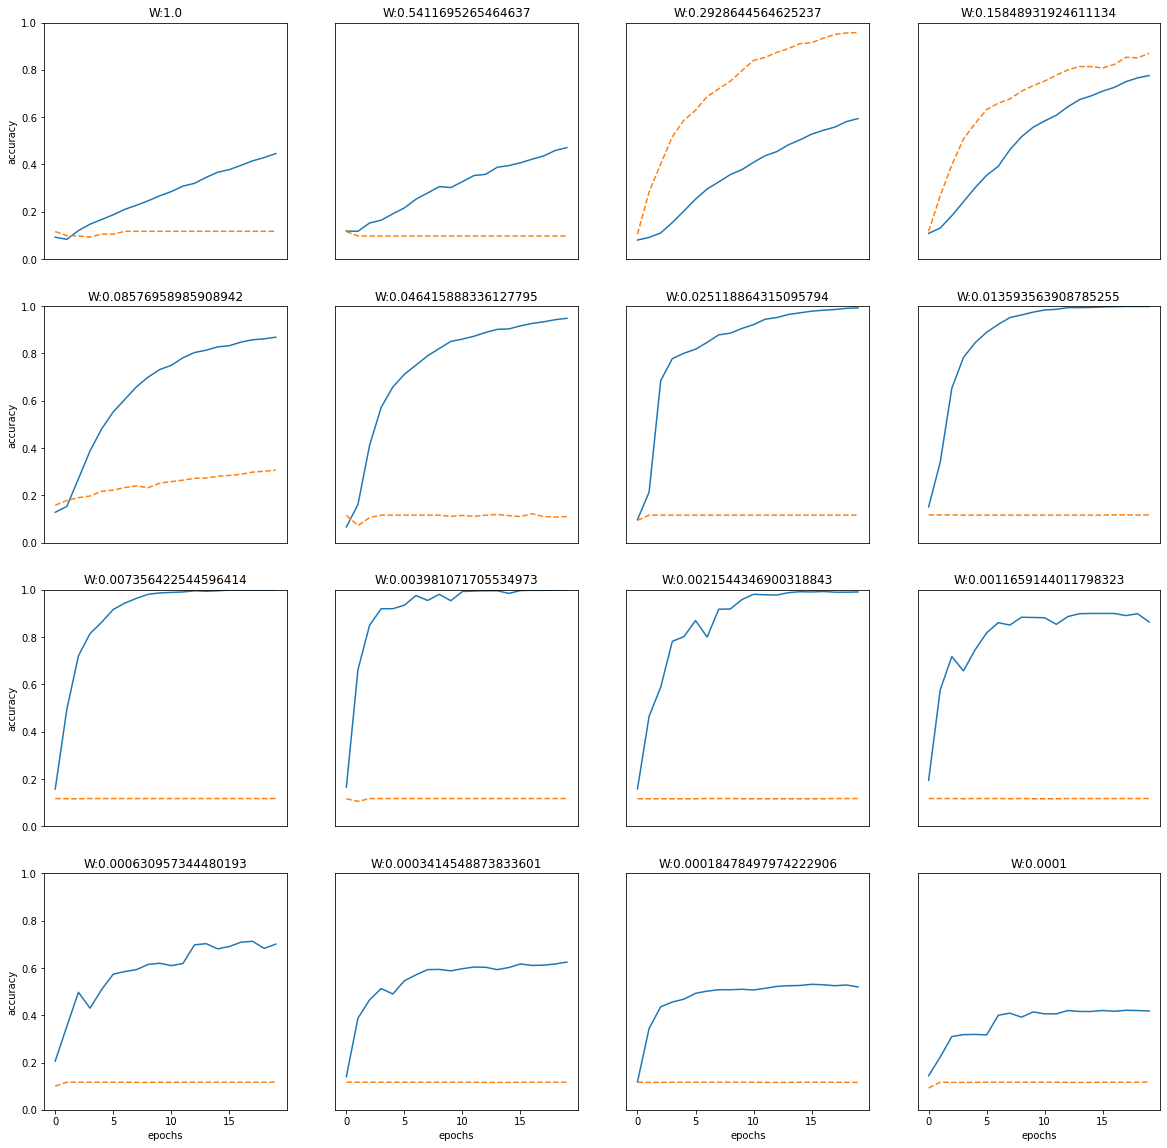

#### Batch Normaliztion의 배경

- Internal Covariance Shift 문제에 대한 개선

배치 정규화 논문에서는 학습에서 불안정화가 일어나는 이유를 'Internal Covariance Shift' 라고 주장하고 있는데, 이는 네트워크의 각 레이어나 Activation 마다 입력값의 분산이 달라지는 현상을 뜻한다.


  

=> 'Internal Covariance Shift'를 알아보기에 앞서 
'Covariate Shift'가 뭔지 알아보자. 

딥러닝이나 머신러닝 모델은 학습(training) 데이터를 기반으로 학습힌다. 고양이와 개를 분류하는 모델을 예로 들자. 모종의 이유로 학습에 사용한 고양이 데이터가 모두 러시안 블루 종이었다고 가정하자. 페르시안 고양이 이미지를 이 모델에 넣으면 모델은 어떤 대답을 내놓을까? 형태를 보고 고양이라 판단할 수도 있지만, 털 색상으로 보아 개라고 판단할 수 도 있을 것이다.

이처럼 트레이닝에 사용한 학습 데이터와 인퍼런스에 사용한 테스트 데이터의 차이가 생기는 것을 Covariate Shift라 한다

통계에서의 Covariate(공변량) 의미 : 공변량이란, 여러 변수들이 공통적으로 함께 공유하고 있는 변량을 뜻한다. 독립 변수들이 종속변수에 얼마나 영향을 주는지 알고할때, 잡음인자가 있을 경우 순수한 독립변수의 영향력을 검출할수 없다. 이때 통계적 방법을 이용한 잡음 인자 통제방법이 바로 공변량이다.
공변량분석(ANCOVA: analysis of covariance)은 실험결과(종속변인)에 영향을 줄 수 있는 잡음인자를 통계적인 방법으로 통제해, 독립변인의 순수한 영향을 측정하려는 것이다 특히, 외생변수가 종속변수와의 상관관계가 높으면 분산분석(ANOVA) 대신 공변량분석을 사용하는 것이 효과적이다.
공변량분석을 공분산분석이라고도 한다.  http://egloos.zum.com/sjm81/v/168499

예를 들어 한 섬유 회사에서 세 대의 기계를 사용하여 단섬유를 제조할때, 회사에서는 섬유의 파손 강도가 기계별(독립변수 X)로 다른지 여부를 확인하려고 한다. 회사에서는 각 기계에서 랜덤하게 추출한 5개 섬유의 강도 및 지름에 대한 데이터를 수집한다. 섬유 강도는 지름과 관련이 있기 때문에 공변량으로 사용할 경우를 위해 섬유 지름도 기록합니다. (X: 기계 종류, 공변량 중 통제요인: 지름, Y : 섬유 강도)

=> 딥러닝에서의 의미와는 조금 다른 것 같다. 딥러닝에서는 그냥 학습 도중에 샘플의 분포가 바뀌는 것을 inner covariate shift라 생각하자.
학습 데이터와 인퍼런스 데이터와의 차이는 covariate shift


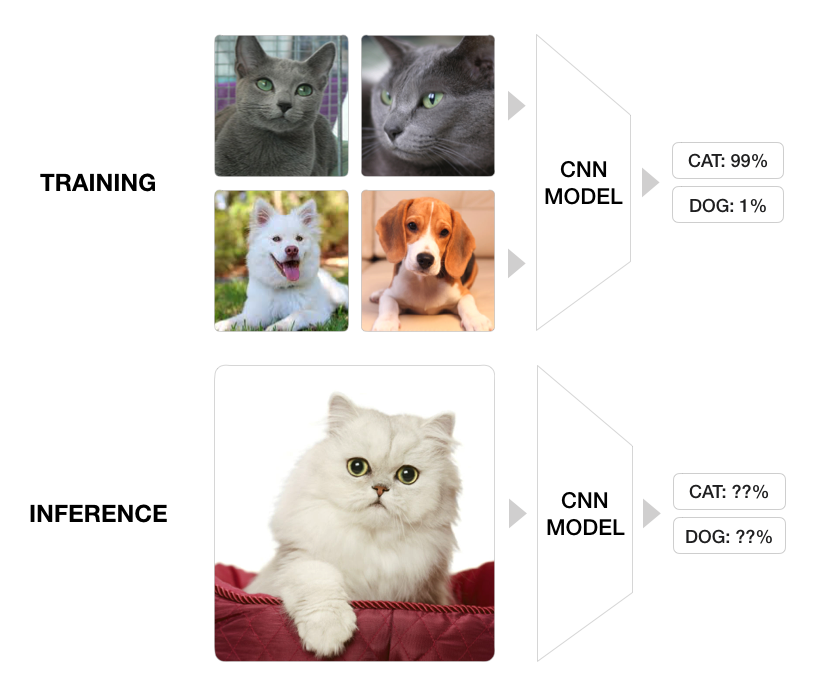

- Covariate Shift 본문 발췌

Another assumption one can make about the connection between the source and the target domains is that given the same observation 
X
=
x
, the conditional distributions of Y are the same in the two domains. However, the marginal distributions of 
X
 may be different in the source and the target domains. Formally, we assume that 
P
s
(
Y
|
X
=
x
)
=
P
t
(
Y
|
X
=
x
)
 for all 
x
∈
X
 , but 
P
s
(
X
)
≠
P
t
(
X
)
. This difference between the two domains is called covariate shift (Shimodaira, 2000).

https://jsideas.net/batch_normalization/

 Covariate Shift : 학습 데이터와 인퍼런스에 사용한 테스트 데이터의 차이가 생기는 것 
  
   Internal Covariate Shift : Covariate Shift 문제를 레이어 레벨로 확장한 것, 레이어를 통과할 때 마다 Covariate Shift 가 일어나면서 입력의 분포가 약간씩 변하는 현상
 (더하여, 미니배치 샘플 별로도 다를수 있는 데이터의 분포의 차이도 포함됨, 예를 들어 첫번째 배치를 통해 수정된 weight와 bias가 다른 분포를 갖는 두번째 배치에 적용되어 레이어에 학습을 적용하게 되므로, 운나쁘게 배치간 데이터 분포가 매우 다른 경우 레이어가 일관된 학습을 하기 어려워지게 된다.)




https://eehoeskrap.tistory.com/430 


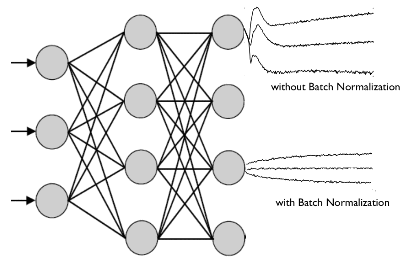

< Whitening vs Batch Normaliztion >

Whitening : 
백색 잡음화,  각 레이어의 입력의 분산을 평균 0, 표준편차 1인 입력값으로 정규화 시키는 방법을 생각해볼 수 있다

단점 : 이는 covariance matrix의 계산과 inverse의 계산이 필요하기 때문에 계산량이 많을 뿐더러, Whitening은 일부 파라미터들의 영향이 무시된다. 예를 들어 입력 값 X를 받아 Z = WX + b 라는 결과를 내놓고 적절한 bias b 를 학습하려는 네트워크에서 Z에 E(Z) 를 빼주는 작업을 한다고 생각해보면, 이 과정에서 b 값이 결국 빠지게 되고, 결과적으로 b의 영향은 없어지게 된다. 단순히 E(Z)를 빼는 것이 아니라 표준편차로 나눠주는 등의 scaling 과정까지 포함될 경우 이러한 경향은 더욱 악화 될 것이며, 논문에서 실험으로 확인을 했다고 한다.


이와 같은 whitening의 단점을 보완하고, internal covariance shift는 줄이기 위해 논문에서는 다음과 같은 접근을 취했다.
각각의 feature들이 이미 uncorrelated 되어있다고 가정하고, feature 각각에 대해서만 scalar 형태로 mean과 variance를 구하고 각각 normalize 한다.
단순히 mean과 variance를 0, 1로 고정시키는 것은 오히려 Activation function의 nonlinearity를 없앨 수 있다. 
예를 들어 sigmoid activation의 입력이 평균 0, 분산 1이라면 출력 부분은 곡선보다는 직선 형태에 가까울 것이다. 또한, feature가 uncorrelated 되어있다는 가정에 의해 네트워크가 표현할 수 있는 것이 제한될 수 있다. 이 점들을 보완하기 위해, normalize된 값들에 scale factor (gamma)와 shift factor (beta)를 더해주고 이 변수들을 back-prop 과정에서 같이 train 시켜준다.
training data 전체에 대해 mean과 variance를 구하는 것이 아니라, mini-batch 단위로 접근하여 계산한다. 현재 택한 mini-batch 안에서만 mean과 variance를 구해서, 이 값을 이용해서 normalize 한다.



Batch Normaliztion : 
이러한 Whitening의 문제점을 해결하도록 한 트릭이 배치 정규화이다. 배치 정규화는 평균과 분산을 조정하는 과정이 별도의 과정으로 떼어진 것이 아니라, 신경망 안에 포함되어 학습 시 평균과 분산을 조정하는 과정 역시 같이 조절된다는 점이 단순 Whitening 과는 구별된다. 즉, 각 레이어마다 정규화 하는 레이어를 두어, 변형된 분포가 나오지 않도록 조절하게 하는 것이 배치 정규화이다. 


https://shuuki4.wordpress.com/2016/01/13/batch-normalization-%EC%84%A4%EB%AA%85-%EB%B0%8F-%EA%B5%AC%ED%98%84/
https://eehoeskrap.tistory.com/430
https://deepinsight.tistory.com/116




1) 배치 정규화 첫번째 과정 (표준화)   ->  분포가 골고루 퍼지게 해주는 역할

: 엡실론은 계산할 때 분모가 0이 되는 문제를 막기 위한 아주 작은 숫자이다(1e-5)

출처: https://eehoeskrap.tistory.com/430 [Enough is not enough]
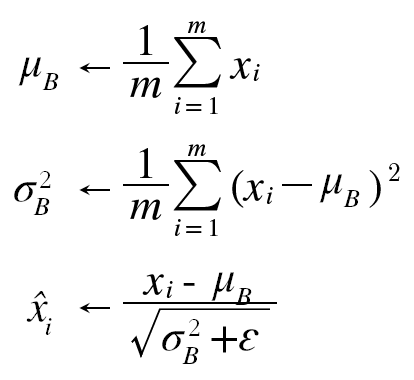

2) 확대 및 이동 변환 (표준화된 x 즉 x'에 대해 감마와 베타를 통해 확대(감마의 역할) 및 이동(베타의 역할)을 한다.

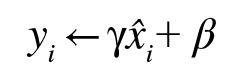
->
표준화가 지속되면 활성화 함수의 비선형적 역할이 감소된다.
즉 데이터를 계속 표준화(정규화) 하게 되면, 활성화 함수의 비선형 성질을 잃게 되는 문제가 발생한다.

예를 들면, 아래 그림과 같이 Sigmoid 함수가 있을 때, 입력 값이 N(0, 1) 이라면, 95% 의 입력 값은 Sigmoid 함수 그래프의 중간 (x = (-1.96, 1.96) 구간)에 속하게 된다.
다량의 데이터가 선형 구간에 존재하게 된다.

그렇기때문에 감마(γ), 베타(β)를 통해 활성함수로 들어가는 값의 범위를 바꿔줌으로써, 비선형 성질을 보존하게 된다.

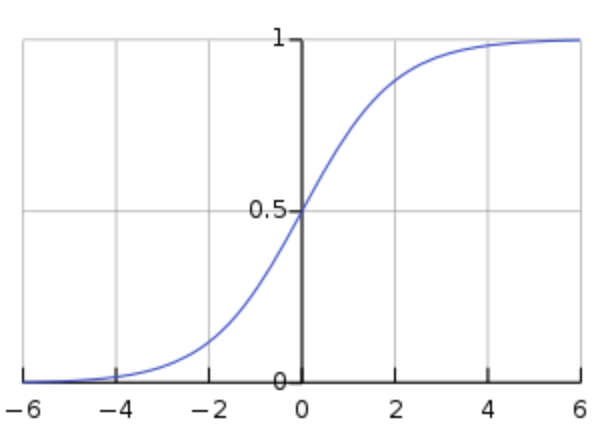

* 논문 자료
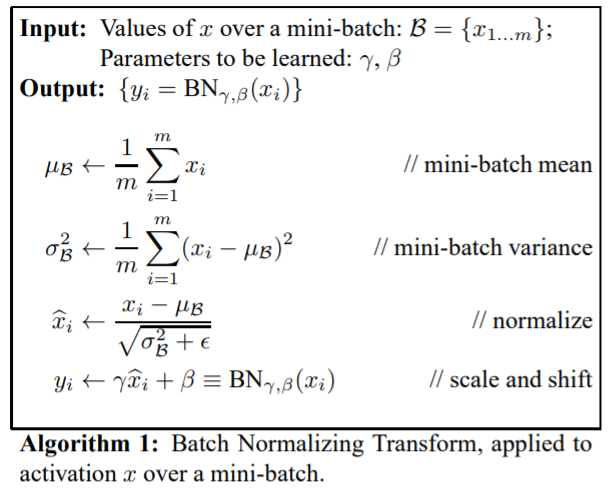

- 배치 정규화 도식화 (backpropagation 매우 복잡함)
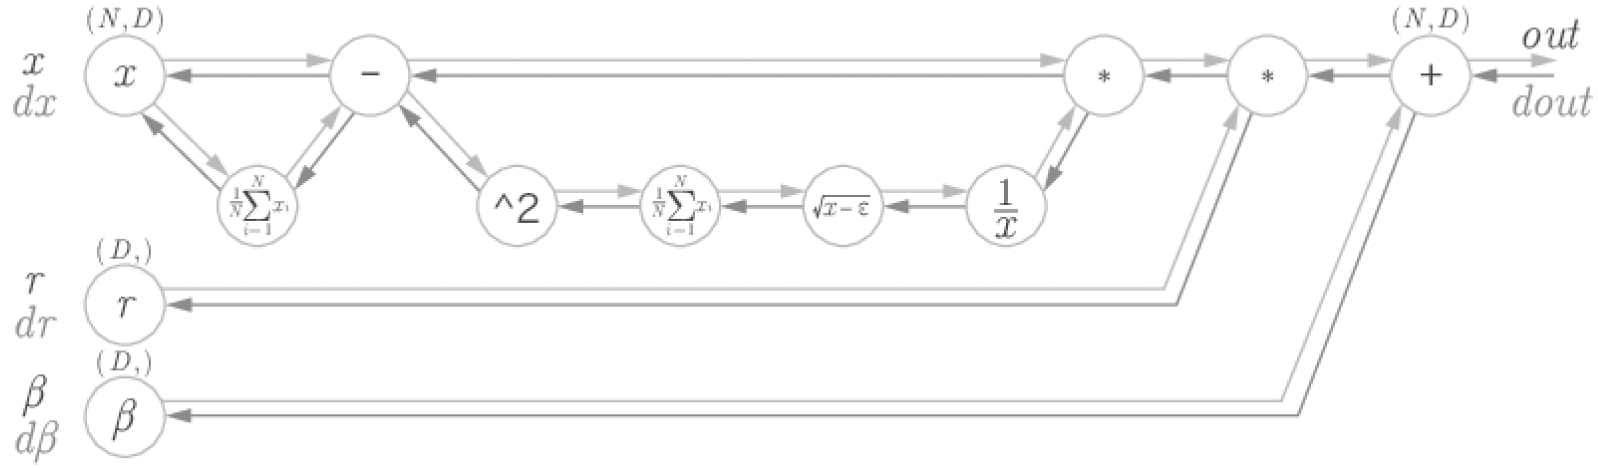

- Backpropagation 
배치 정규화는 미니배치의 평균과 분산을 이용해서 정규화 한 뒤에, scale 및 shift 를 감마(γ) 값, 베타(β) 값을 통해 실행한다. 이 때 감마와 베타 값은 학습 가능한 변수이다. 즉, Backpropagation을 통해서 학습이 된다.
아래는 감마와 베타에 대한 Backpropagation 수식이다.
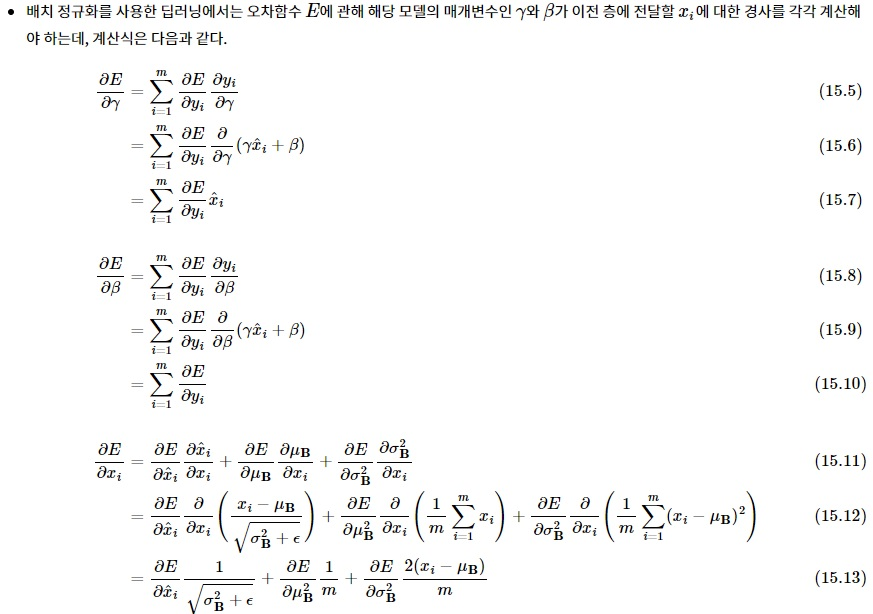


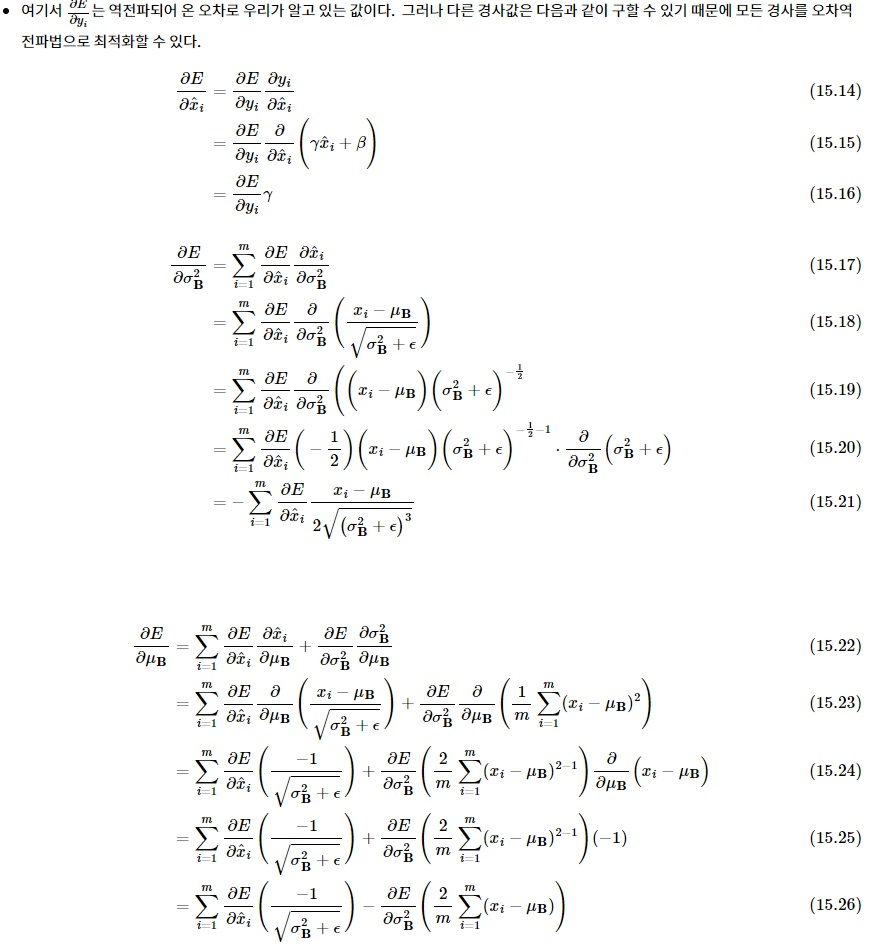
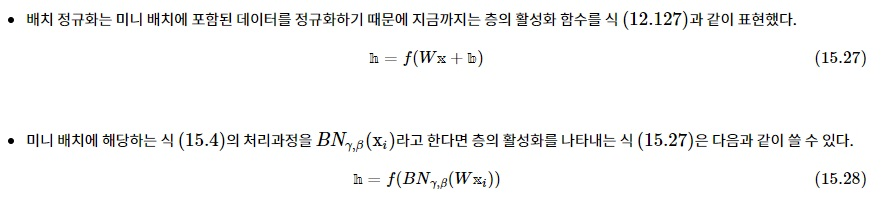

N이 표준화과정, B가 감마/베타 적용과정이다.

https://forensics.tistory.com/30

- 실제 논문에서 언급된 backpropagation에 활용될 식 (L이 로스함수이다)
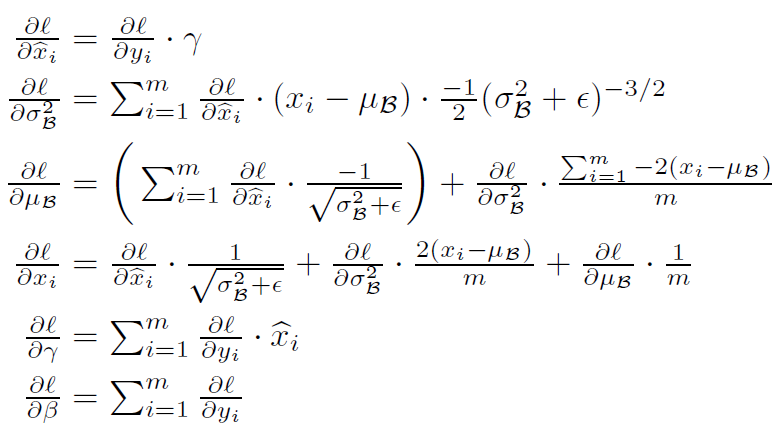
https://arxiv.org/pdf/1502.03167.pdf

테스트 단계에서는 어떻게 적용해야하는가? 

(테스트는 단계는 미니배치를 사용하지 않고 1-sample씩 모델을 적용하므로)

+ Dropout처럼 학습/테스트 단계의 연산이 다름

+ 학습단계는 데이터가 배치단위로 들어오기 때문에 배치의 평균, 분산을 구하는 것이 가능 하지만,

   테스트 단계에서는 배치 단위로 평균/분산을 구하기가 어려움

+ 이를 해결하기 위해서는?

1) 학습단계때 배치단위의 평균/분산을 저장해놓기 (이동평균)

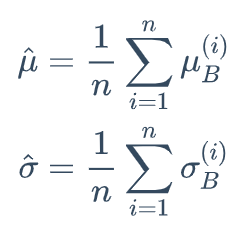


2) 테스트시에 n개 단위로 구해진 이동평균을 사용하여 정규화
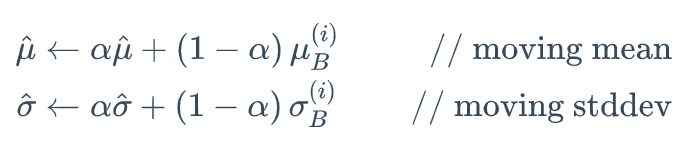

- 이러한 이동 평균과 분산을 위해, 모델 학습 단계에서 매 미니배치마다 이동 평균과 분산을 저장해놔야한다.

- 그래야 테스트 시, 모델 학습 단계에서 저장한 이동 평균과 분산을 사용할 수 있다.

- 위의 식에서 α값은 일반적으로 1에 가까운 0.9, 0.99, 0.999로 설정한다.

- Batch Normalization 의 Inferecne 시 Moving Average 계산 식


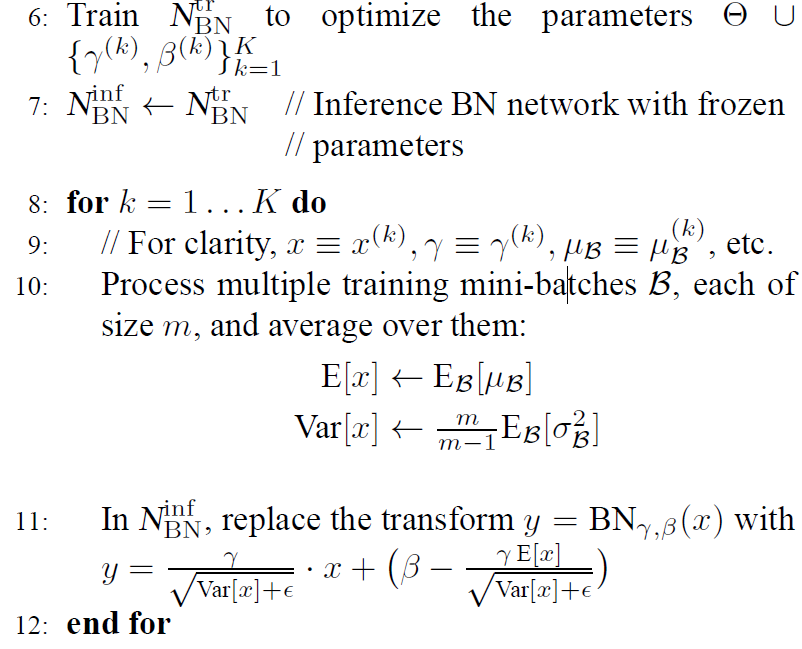

inference 전에 학습 시에 미리 미니 배치를 뽑을 때 Sample Mean 및 Sample Variance 를 이용하여 각각의 이동 평균을 구해놔야한다. 위 수식에서 Inference 시에 평균은 각 미니 배치에서 구한 평균들의 평균을 사용하고, 분산은 분산의 평균에 m/(m-1) 을 곱해주게 된다. 이를 곱하는 이유는 통계학적으로 unbiased variance 에는 "Bessel's correction"을 통해 보정을 해주는 것이다. 이는 학습 전체 데이터에 대한 분산이 아니라 미니 배치들의 분산을 통해 전체 분산을 추정할 때 통계학 적으로 보정을 위해 Bessel의 보정 값을 곱해주는 방식으로 추정하기 때문이다...




https://eehoeskrap.tistory.com/430


https://arxiv.org/pdf/1502.03167.pdf ## 논문

# 코드 구현 링크 : 아직은 내가 이해하기 어렵다.
# oreilly-japan/deep-learning-from-scratch 깃허브

https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch06/batch_norm_gradient_check.py

deep-learning-from-scratch-master.zip 파일에 다 수록되어 있음

In [1]:
class BatchNormalization:
    """
    http://arxiv.org/abs/1502.03167
    """
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None # 합성곱 계층은 4차원, 완전연결 계층은 2차원  

        # 시험할 때 사용할 평균과 분산
        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward 시에 사용할 중간 데이터
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        self.input_shape = x.shape
        if x.ndim != 2:
            N, C, H, W = x.shape
            x = x.reshape(N, -1)

        out = self.__forward(x, train_flg)
        
        return out.reshape(*self.input_shape)
            
    def __forward(self, x, train_flg):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0)
            xc = x - mu
            var = np.mean(xc**2, axis=0)
            std = np.sqrt(var + 10e-7)
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var            
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        return out

    def backward(self, dout):
        if dout.ndim != 2:
            N, C, H, W = dout.shape
            dout = dout.reshape(N, -1)

        dx = self.__backward(dout)

        dx = dx.reshape(*self.input_shape)
        return dx

    def __backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta
        
        return dx